In [2]:
import librosa
import numpy as np
file_name=r"C:\mine\guitar_notes_classification\output\output1.wav"
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

In [ ]:
pip  install matplotlib --user

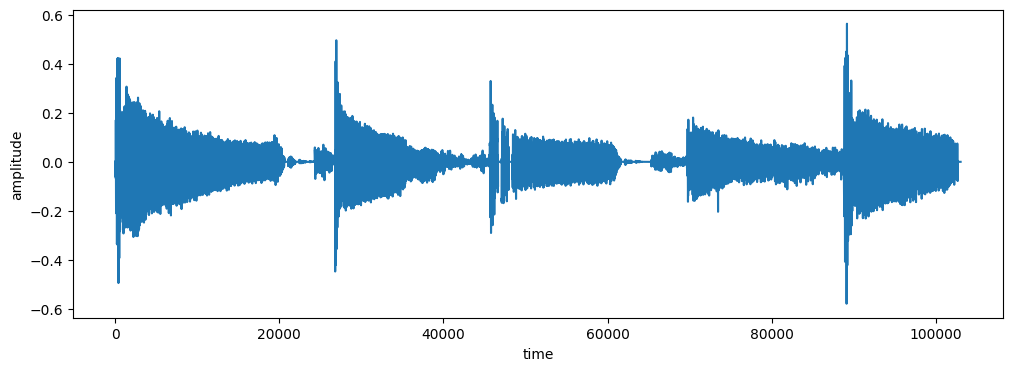

In [5]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(audio)

In [7]:
from pydub import AudioSegment
sound = AudioSegment.from_wav(file_name)
sound.duration_seconds == (len(sound) / 1000.0)


C:\Users\Shubhayan\.conda\envs\new1\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


True

In [8]:
sound.duration_seconds

4.672

In [9]:
minutes_duartion = int(sound.duration_seconds // 60)
seconds_duration = round((sound.duration_seconds % 60), 3)
print(minutes_duartion, ':', round(seconds_duration, 0))
print(minutes_duartion * 60 + round(seconds_duration, 0))

0 : 5.0
5.0


In [11]:
seconds_duration

4.672

In [24]:
for i in range(len(audio)):
    if audio[i] in l1:
        print(i)

89165
89166
89167
89168


In [22]:
l1=sorted(audio)[-4:]

In [23]:
l1

[0.55033356, 0.5557028, 0.5610194, 0.5629793]

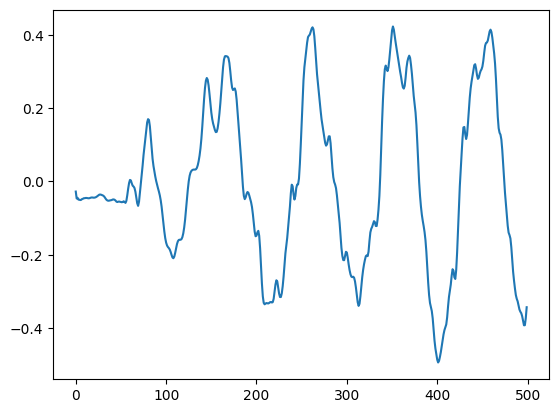

In [45]:
plt.plot(audio[:500])

In [27]:
max(mfccs_scaled_features)

155.23167

In [46]:
sample_rate

22050

48000
Duration of Audio in Seconds 4.672
Duration of Audio in Minutes 0.07786666666666667


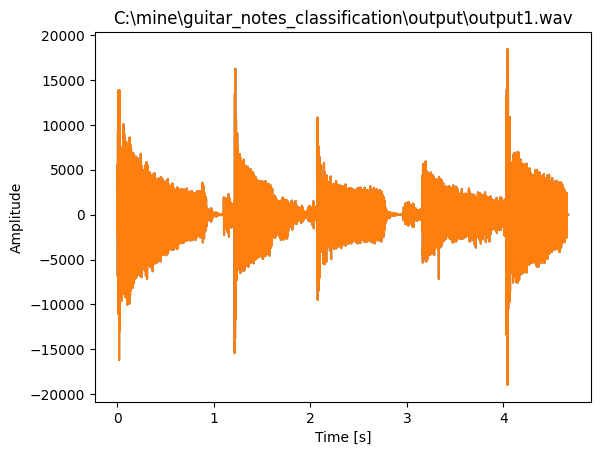

In [48]:
# Loading the Libraries
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt

# Read the Audiofile
samplerate, data = read(file_name)
# Frame rate for the Audio
print(samplerate)

# Duration of the audio in Seconds
duration = len(data)/samplerate
print("Duration of Audio in Seconds", duration)
print("Duration of Audio in Minutes", duration/60)

time = np.arange(0,duration,1/samplerate)

# Plotting the Graph using Matplotlib
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(file_name)
plt.show()

In [51]:
for i in data

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [52]:
data

array([[-1263, -1263],
       [-1337, -1337],
       [-1402, -1402],
       ...,
       [    0,     0],
       [    0,     0],
       [    0,     0]], dtype=int16)

In [61]:
data1=[]
for i in range(len(data)):
    if data[i][0]>=0:
        data1.append(data[i][0])
#         print(data[i][0])

In [84]:
for i in data1:
    if i>10000:
        print(i)

10280
10631
10896
11075
11177
11219
11223
11209
11193
11183
11175
11157
11111
11015
10853
10616
10308
10314
10663
10965
11267
11598
11955
12308
12613
12836
12966
13025
13050
13084
13150
13254
13384
13518
13638
13730
13779
13772
13692
13520
13246
12869
12399
11863
11291
10721
10182
10188
10349
10346
10225
10055
10144
10428
10769
11140
11531
11940
12364
12790
13193
13532
13764
13859
13808
13635
13383
13100
12823
12566
12323
12083
11835
11579
11321
11064
10810
10563
10325
10104
10261
10548
10750
10900
11034
11157
11240
11239
11127
10909
10619
10289
10210
10400
10503
10499
10385
10182
10071
10183
10346
10570
10853
11182
11528
11852
12113
12288
12376
12403
12411
12443
12525
12664
12847
13051
13250
13417
13531
13575
13540
13426
13242
13001
12722
12420
12105
11778
11427
11033
10567
10007
10258
10722
11133
11480
11771
12023
12262
12500
12741
12973
13184
13367
13524
13657
13762
13822
13817
13734
13586
13411
13259
13168
13150
13172
13172
13075
12818
12373
11752
11009
10220
10086
10025
10362
1070

In [86]:
from peakdetect import peakdetect

peaks = peakdetect(data1, lookahead=20) 

In [89]:
higherPeaks = np.array(peaks[0])
lowerPeaks = np.array(peaks[1])

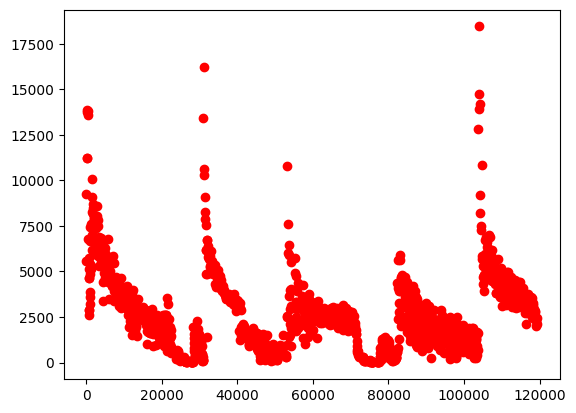

In [90]:
plt.plot(higherPeaks[:,0], higherPeaks[:,1], 'ro')

In [100]:
for i in range(len(higherPeaks)-1):
    if higherPeaks[i][1]>=higherPeaks[i+1][1]:
        print(higherPeaks[i][1])

13859
13822
6781
4647
2867
5720
5153
6667
5436
3601
4887
7466
6836
7609
10086
8279
9078
8692
8482
8170
7673
7912
7872
7949
7987
7525
8589
7813
7471
6897
6824
6430
5980
4394
6474
6251
6294
6005
5605
5852
4822
6772
5394
5000
4662
4635
4750
4404
5487
4211
5858
4205
3935
5446
4570
4706
4282
4305
4460
3620
4354
4050
4625
4113
3659
3939
3793
3496
3359
4047
4070
3328
4182
3430
2996
2592
3889
3682
3025
2963
3503
3370
3448
2144
3815
3969
3375
2843
3231
3062
2918
3077
3112
2399
3465
2809
2924
2862
2699
2617
2476
2766
3042
2605
2814
2568
2746
2866
2282
1724
2797
2647
2597
2802
2349
2433
2719
2917
2208
1586
2523
2569
2343
2437
2636
2524
2451
2319
2220
2165
2109
2174
2465
2439
2589
2416
1628
2625
1933
2582
1789
2608
2627
1329
1479
3556
3194
2409
2366
1775
1977
1804
840
742
717
620
568
444
598
438
711
644
436
414
300
212
212
174
116
230
279
87
75
132
99
99
73
112
126
99
88
42
23
21
1923
1591
1346
1097
776
612
1849
1323
1151
1123
1425
958
771
2287
1553
1282
798
1813
1544
974
1144
1333
1145
1154
1138


In [6]:
import os
for i in os.listdir('audiofiles'):
    if (os.path.isdir(f'audiofiles\\{i}')):
       for j in os.listdir((f'audiofiles\\{i}')):
        if 'Copy' in j:
            os.remove(f'audiofiles\\{i}\\{j}')

In [9]:
import random
import pandas as pd
randlist=[]
rangelist=[20,25,30,27,37,46,36,56,31,77,67,65,78,90,78,88,99,66,53,33,25,55,66,43,55]
for i in range(1000):
    for j in rangelist:
        ranl=[]
        for z in range(j):
            ranl.append(random.randint(0,6))
        randlist.append(ranl)
df=pd.DataFrame({'data':randlist})

In [10]:
df.to_csv('data_fored.csv')

In [11]:
df

,data
0,"[3, 5, 1, 1, 2, 6, 2, 6, 0, 4, 5, 4, 4, 1, 0, ..."
1,"[5, 0, 2, 3, 2, 0, 5, 6, 3, 0, 6, 0, 0, 1, 5, ..."
2,"[1, 2, 6, 6, 1, 5, 4, 4, 2, 1, 2, 4, 6, 6, 6, ..."
3,"[6, 3, 3, 4, 3, 5, 2, 6, 5, 0, 1, 6, 4, 0, 2, ..."
4,"[1, 0, 4, 2, 5, 3, 4, 4, 6, 5, 5, 0, 0, 4, 0, ..."
...,...
24995,"[1, 5, 1, 0, 4, 6, 1, 1, 3, 4, 1, 1, 4, 2, 2, ..."
24996,"[1, 4, 1, 4, 3, 4, 0, 6, 1, 2, 3, 4, 4, 0, 3, ..."
24997,"[2, 4, 2, 6, 0, 1, 0, 2, 5, 1, 3, 1, 0, 5, 0, ..."
24998,"[0, 6, 6, 0, 3, 2, 3, 0, 5, 1, 4, 2, 3, 2, 3, ..."


In [45]:
randlist[0]

[3, 5, 1, 1, 2, 6, 2, 6, 0, 4, 5, 4, 4, 1, 0, 1, 2, 3, 1, 0]

In [48]:
l1,l2=[],[]
for i in range(len(randlist)):
    l1.append(randlist[i][:int(len(randlist[i])/2)])
    l2.append(randlist[i][int(len(randlist[i])/2):])

In [49]:
df['1st']=l1
df['2nd']=l2

In [50]:
df['1st'][0]

[3, 5, 1, 1, 2, 6, 2, 6, 0, 4]

In [51]:
df['2nd'][0]

[5, 4, 4, 1, 0, 1, 2, 3, 1, 0]

In [32]:
df['data'][0]

[3, 5, 1, 1, 2, 6, 2, 6, 0, 4, 5, 4, 4, 1, 0, 1, 2, 3, 1, 0]

In [36]:
l1[0]

3    [6, 3, 3, 4, 3, 5, 2, 6, 5, 0, 1, 6, 4, 0, 2, ...
5    [4, 2, 6, 1, 3, 4, 0, 3, 4, 4, 4, 0, 2, 6, 4, ...
1    [5, 0, 2, 3, 2, 0, 5, 6, 3, 0, 6, 0, 0, 1, 5, ...
1    [5, 0, 2, 3, 2, 0, 5, 6, 3, 0, 6, 0, 0, 1, 5, ...
2    [1, 2, 6, 6, 1, 5, 4, 4, 2, 1, 2, 4, 6, 6, 6, ...
6    [0, 3, 6, 5, 3, 0, 2, 0, 1, 2, 2, 0, 0, 6, 1, ...
2    [1, 2, 6, 6, 1, 5, 4, 4, 2, 1, 2, 4, 6, 6, 6, ...
6    [0, 3, 6, 5, 3, 0, 2, 0, 1, 2, 2, 0, 0, 6, 1, ...
0    [3, 5, 1, 1, 2, 6, 2, 6, 0, 4, 5, 4, 4, 1, 0, ...
4    [1, 0, 4, 2, 5, 3, 4, 4, 6, 5, 5, 0, 0, 4, 0, ...
Name: data, dtype: object

In [53]:
df.to_csv('data_fored.csv')

In [54]:
import random
import pandas as pd
randlist=[]
for i in range(1000):
    ranl=[]
    for z in range(20):
        ranl.append(random.randint(0,6))
    randlist.append(ranl)
df=pd.DataFrame({'data':randlist})

In [55]:
df

,data
0,"[3, 6, 5, 3, 2, 6, 1, 4, 0, 1, 2, 0, 0, 2, 3, ..."
1,"[4, 2, 3, 2, 1, 2, 5, 0, 6, 4, 1, 5, 3, 3, 6, ..."
2,"[0, 5, 0, 5, 4, 2, 0, 3, 0, 5, 6, 3, 4, 1, 5, ..."
3,"[6, 6, 5, 0, 0, 5, 4, 6, 1, 0, 1, 4, 6, 3, 6, ..."
4,"[3, 4, 0, 2, 3, 4, 1, 0, 1, 0, 3, 4, 2, 2, 3, ..."
...,...
995,"[6, 4, 6, 3, 5, 5, 1, 6, 3, 2, 2, 4, 6, 2, 4, ..."
996,"[6, 4, 3, 6, 6, 3, 5, 6, 5, 3, 1, 3, 5, 3, 6, ..."
997,"[6, 5, 2, 5, 6, 1, 5, 4, 1, 2, 4, 4, 4, 1, 3, ..."
998,"[4, 2, 1, 1, 4, 0, 0, 0, 3, 0, 5, 1, 6, 2, 0, ..."


In [59]:
len(randlist[1][:10])

10

In [62]:
l1,l2=[],[]
for i in range(len(randlist)):
    l1.append(randlist[i][:10])
    l2.append(randlist[i][10:])

In [63]:
df['first']=l1
df['second']=l2

In [64]:
df

,data,first,second
0,"[3, 6, 5, 3, 2, 6, 1, 4, 0, 1, 2, 0, 0, 2, 3, ...","[3, 6, 5, 3, 2, 6, 1, 4, 0, 1]","[2, 0, 0, 2, 3, 5, 5, 6, 5, 0]"
1,"[4, 2, 3, 2, 1, 2, 5, 0, 6, 4, 1, 5, 3, 3, 6, ...","[4, 2, 3, 2, 1, 2, 5, 0, 6, 4]","[1, 5, 3, 3, 6, 5, 1, 2, 0, 1]"
2,"[0, 5, 0, 5, 4, 2, 0, 3, 0, 5, 6, 3, 4, 1, 5, ...","[0, 5, 0, 5, 4, 2, 0, 3, 0, 5]","[6, 3, 4, 1, 5, 1, 3, 5, 5, 2]"
3,"[6, 6, 5, 0, 0, 5, 4, 6, 1, 0, 1, 4, 6, 3, 6, ...","[6, 6, 5, 0, 0, 5, 4, 6, 1, 0]","[1, 4, 6, 3, 6, 1, 0, 4, 3, 1]"
4,"[3, 4, 0, 2, 3, 4, 1, 0, 1, 0, 3, 4, 2, 2, 3, ...","[3, 4, 0, 2, 3, 4, 1, 0, 1, 0]","[3, 4, 2, 2, 3, 1, 4, 2, 6, 5]"
...,...,...,...
995,"[6, 4, 6, 3, 5, 5, 1, 6, 3, 2, 2, 4, 6, 2, 4, ...","[6, 4, 6, 3, 5, 5, 1, 6, 3, 2]","[2, 4, 6, 2, 4, 3, 3, 3, 5, 6]"
996,"[6, 4, 3, 6, 6, 3, 5, 6, 5, 3, 1, 3, 5, 3, 6, ...","[6, 4, 3, 6, 6, 3, 5, 6, 5, 3]","[1, 3, 5, 3, 6, 6, 3, 0, 5, 2]"
997,"[6, 5, 2, 5, 6, 1, 5, 4, 1, 2, 4, 4, 4, 1, 3, ...","[6, 5, 2, 5, 6, 1, 5, 4, 1, 2]","[4, 4, 4, 1, 3, 6, 2, 4, 3, 5]"
998,"[4, 2, 1, 1, 4, 0, 0, 0, 3, 0, 5, 1, 6, 2, 0, ...","[4, 2, 1, 1, 4, 0, 0, 0, 3, 0]","[5, 1, 6, 2, 0, 1, 5, 5, 5, 2]"


In [65]:
df.to_csv('df_fored_samelength.csv')

In [6]:
pip install pvrecorder

     ---------------------------------------- 3.8/3.8 MB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
from plyer.facades import Audio
import time
Audio.start() # starts recording
time.sleep(5)
Audio.stop() # stops recording

NameError: name 'self' is not defined

In [12]:
from pvrecorder import PvRecorder
import wave
import struct
for index, device in enumerate(PvRecorder.get_audio_devices()):
    print(f"[{index}] {device}")

[0] Microphone Array (Intel® Smart Sound Technology for Digital Microphones)
[1] Microphone (DroidCam Virtual Audio)


In [18]:
path=r'sample_audio.wav'
recorder = PvRecorder(device_index=1, frame_length=512)
audio = []

try:
    recorder.start()

    while True:
        frame = recorder.read()
        audio.extend(frame)
    time.sleep(5)
except KeyboardInterrupt:
    recorder.stop()
    with wave.open(path, 'w') as f:
        f.setparams((1, 2, 16000, 512, "NONE", "NONE"))
        f.writeframes(struct.pack("h" * len(audio), *audio))
finally:
    recorder.delete()

In [39]:
sound=[1,5,6,3,6,0,3,5,4,1]
from pydub import AudioSegment
from pydub import effects
velocidad_X = 1.5 # No puede estar por debajo de 1.0

final=0
for i in range(len(sound)):
    final+=AudioSegment.from_wav(f'real_music/{sound[i]}.wav')
#     so = final.speedup(velocidad_X, 150, 25)
    final_audio=final.export('final.wav',format='wav')

sound = AudioSegment.from_wav('final.wav')
so = sound.speedup(velocidad_X, 150, 25)
final_au=so.export(r'final.wav', format = 'wav')

In [21]:
d1=AudioSegment.from_wav('real_music/1.wav')

In [23]:
type(d1)

pydub.audio_segment.AudioSegment